#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2020


# CSCE 670: Spot Light : Investigating Pandas and its core features

# 1: Introduction

According to <a href = "https://pandas.pydata.org/docs/user_guide/index.html">Pandas Pydata </a>, Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 

Pandas is one of the most popular python libraries that is used for data analysis. It has back-end source code is written in C or Python. It provides highly optimized performance. There are two ways we can analyze the data in pandas i.e., Series and DataFrames

# 2: Setup

Installing Pandas using pip:
Using Commnad Line Prompt,
enter : pip install pandas

# 3: Features

There are a lot of features that can be implemented with the help of pandas such as Cleaning up data, Handling of data, Alignment and indexing, Handling missing data, Merging and joining of datasets, Optimized performance, Grouping, Mask data, Perform mathematical operations on the data, etc. In this case, I used the IMDB 5000 Movie Dataset to implement the features of pandas. 


# 3.1: Handling and Cleaning the data



In [186]:
import pandas as pd
imdbDF = pd.read_csv("imdb_dataset.csv")

In [3]:
print(" Shape of Dataframe: ") 
print(imdbDF.shape) 

 Shape of Dataframe: 
(5043, 28)


From the result we can see that the dataset has 5043 rows and 28 columns. 

In [4]:
# Names of the columns are as follows
print("Columns' Names")
print(imdbDF.columns.values)

Columns' Names
['color' 'director_name' 'num_critic_for_reviews' 'duration'
 'director_facebook_likes' 'actor_3_facebook_likes' 'actor_2_name'
 'actor_1_facebook_likes' 'gross' 'genres' 'actor_1_name' 'movie_title'
 'num_voted_users' 'cast_total_facebook_likes' 'actor_3_name'
 'facenumber_in_poster' 'plot_keywords' 'movie_imdb_link'
 'num_user_for_reviews' 'language' 'country' 'content_rating' 'budget'
 'title_year' 'actor_2_facebook_likes' 'imdb_score' 'aspect_ratio'
 'movie_facebook_likes']


## 3.1.1 Handling Missing Data
#### pandas.DataFrame.isna() is used to find missing values. The returned value is a Boolean object. The NA values are numpy.NaN or None. This is similar to pandas.DataFrame.isnull() .

In [5]:
# Null values are as follows:
print("Null Values are") 
print(imdbDF.isna())

Null Values are
      color  director_name  num_critic_for_reviews  duration  \
0     False          False                   False     False   
1     False          False                   False     False   
2     False          False                   False     False   
3     False          False                   False     False   
4      True          False                    True      True   
...     ...            ...                     ...       ...   
5038  False          False                   False     False   
5039  False           True                   False     False   
5040  False          False                   False     False   
5041  False          False                   False     False   
5042  False          False                   False     False   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                       False                   False         False   
1                       False                   False         False   
2 

#### The total number of missing values in each column can be calculated  using sum()

In [6]:
# using sum()
print(imdbDF.isna().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


#### We can use another sum() to calculate the total number of null values in the imdb dataset.

In [7]:
print("Number of null values in Dataset")
print(imdbDF.isna().sum().sum())

Number of null values in Dataset
2698


## 3.1.2 Cleaning the Data
We can remove rows that has NA by dropping them. 

In [8]:
imdbDF_clean = imdbDF.dropna(how='any')

In [9]:
print("Shape of new dataframe") 
print(imdbDF_clean.shape)

Shape of new dataframe
(3756, 28)


#### Conclusion: 
With the help of dropping the rows that have values of NA, we are able to reduce the rows' count by 1287. 


#### Generally by dropping all rows with the missing value, we might lose required information. For that situation, pandas.DataFrame.fillna() can be used to replace NA/NaN values with some fixed value. 

We can replace the NA or NaN values by some value say for example we can replace it by 0. 

In [13]:
#replace the NA or NaN values by some value say for example we can replace it by 0. 
imdbDF.fillna(value=0, inplace = True) 

#### Using DataFrame.fillna() we can fill specific columns with values, For example: 
Method 1:

In [14]:
imdbDF[['gross', 'budget']] = imdbDF[['gross', 'budget']].fillna(value=0)

Method 2:
For ‘object’ dtypes in columns, we can fill up “no info” in the missing places.

In [15]:
imdbDF['aspect_ratio'].fillna("no info", inplace=True)

Method 3:
Filling up using ffill method where last valid value is propagated to the next. 
Also Filling up using bfill is used to fill the next observed value in the missing place

In [16]:
imdbDF['aspect_ratio'].fillna(method='ffill', inplace=True)
imdbDF['aspect_ratio'].fillna(method='bfill', inplace=True)

Method 4: 
We can also use another effective method where the mean of the column is used to fill the missing values. 

### pandas.DataFrame.duplicated( ) : To find duplicate data
Till now we dealt with missing data, sometimes the dataframe may contain duplicated rows. 
pandas.Dataframe.duplicated() returns a Boolean series to give duplicated rows. Fir st of all we need to find the number of  duplicated rows are in the dataset.

In [18]:
# Calculating the number of  duplicated rows in the dataset.
dupRowsDF = imdbDF[imdbDF.duplicated()]
print("The number of  duplicated rows are in the dataset")



The number of  duplicated rows are in the dataset


In [19]:
print(dupRowsDF.shape)

(45, 28)


Hence,
No. of rows with duplicate elements = 45 present in each column. 

In [24]:
# for individual column say aspect_ratio
dupRowsDF_movie_imdb_link= imdbDF[imdbDF.duplicated(['movie_imdb_link'])]

In [26]:
print(dupRowsDF_movie_imdb_link.shape)

(124, 28)


### pandas.Series.unique(): To find unique number of cases
##### From the above result, we can say 124 movies have the same movie link 

In [44]:
print("Unique movie links:")
print(len(imdbDF.movie_imdb_link.unique()))

Unique movie links:
4919


 ### pandas.DataFrame.drop_duplicates():  Delete duplicate rows & we can use use the unique rows for analysis

In [45]:
print("imdbDF shape after duplicates are dropped")

print(imdbDF.drop_duplicates().shape) 

imdbDF shape after duplicates are dropped
(4998, 29)


### Data Processing Technique:
### Data Binning/bucketing using pandas.cut( )
We can the separate various movies into various bauckets based on the movie ratings. For example,

In [46]:
# separating into different categories
label = ['Low', 'Avg', 'Good', 'Best']
diffCategories = [0.,3., 6.5 ,7.,10.]


In [47]:
imdbDF['Ownlabels'] = pd.cut(imdbDF['imdb_score'], labels=label, bins=diffCategories, include_lowest=False)

In [48]:
imdbDF[['movie_title', 'imdb_score', 'Ownlabels']][100:120]

,movie_title,imdb_score,Ownlabels
100,The Fast and the Furious,6.7,Good
101,The Curious Case of Benjamin Button,7.8,Best
102,X-Men: First Class,7.8,Best
103,The Hunger Games: Mockingjay - Part 2,6.6,Good
104,The Sorcerer's Apprentice,6.1,Avg
105,Poseidon,5.6,Avg
106,Alice Through the Looking Glass,6.4,Avg
107,Shrek the Third,6.1,Avg
108,Warcraft,7.3,Best
109,Terminator Genisys,6.6,Good


## 3.2 Data Visualization: Using pandas, find the ouliers
Finding outliers is an important aspect in Exploratory Data Analysis. Thwy can distort the original picture. Specifically, outliers can play havoc when we want to apply machine learning algorithm for prediction.

### 3.2.1 Seaborn Box Plot:
Box plot is a method of visualizing the data distribution using median, quartiles and outliers. 
We will use seaborn library here:

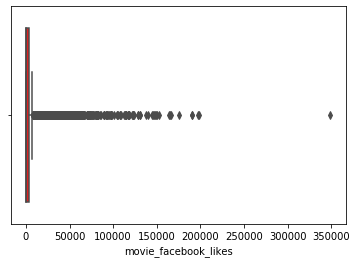

In [187]:
import seaborn as sns
import matplotlib as plt
sns.boxplot(x=imdbDF['movie_facebook_likes'], color='red')

### 3.2.2 pandas.DataFrame.describe(): Finding Statistical distribution of the column

In [56]:
print("Statistical distribution of the column - movie_facebook_likes ")
imdbDF['movie_facebook_likes'].describe()

Statistical distribution of the column - movie_facebook_likes 


count      5043.000000
mean       7525.964505
std       19320.445110
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

Z Score and Outliers: To plot Zscore plot,  we can use numpy.random.normal()

### 3.2.3 DataFrame.dtypes: To find datatypes of all the columns

In [188]:
imdbDF.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## 3.3 Plotting using pandas using Dataframe.plot()

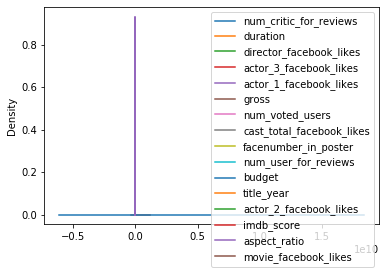

In [189]:
imdbDF.plot(kind = "kde")


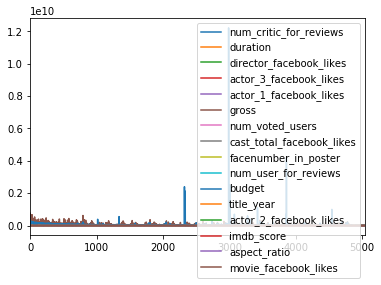

In [59]:
imdbDF.plot(kind = "line")

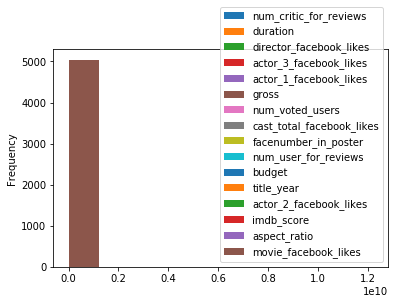

In [60]:
imdbDF.plot(kind = "hist")

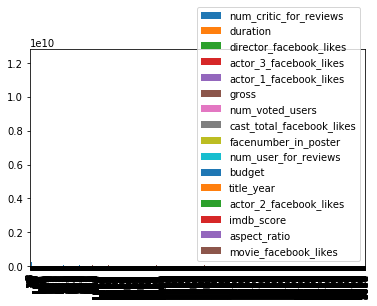

In [66]:
imdbDF.plot(kind = "bar")

## 3.4 Data Sampling using pandas with replacement and weights¶

In [69]:
data = {"X": [10, 20, 50, 70, 30, 80], "Y":[12, 3, 4, 5, 17, 9]}
df = pd.DataFrame(data)
df


,X,Y
0,10,12
1,20,3
2,50,4
3,70,5
4,30,17
5,80,9


In [70]:
# using replacement
df.sample(n = 6, replace = True, random_state = 2)

# by adding weights
df.sample(n = 6, replace = True, random_state = 2, weights = "Y")

,X,Y
3,70,5
0,10,12
4,30,17
3,70,5
3,70,5
2,50,4


## 3.5 In a list, create one row for each item using explode

In [80]:
d = {"College":["Engineering", "Arts & Commerce"], 
    "Dept":[["CS", "ECE", "EEE", "Mech", "Agri", "Civil"],["Ethics", "History", "Geography", "Civics"]]}
df = pd.DataFrame(d)
df



,College,Dept
0,Engineering,"[CS, ECE, EEE, Mech, Agri, Civil]"
1,Arts & Commerce,"[Ethics, History, Geography, Civics]"


In [81]:
print("Generate new rows for each player with the help of explode")


Generate new rows for each player with the help of explode


In [82]:
df1 = df.explode("Dept")
df1

,College,Dept
0,Engineering,CS
0,Engineering,ECE
0,Engineering,EEE
0,Engineering,Mech
0,Engineering,Agri
0,Engineering,Civil
1,Arts & Commerce,Ethics
1,Arts & Commerce,History
1,Arts & Commerce,Geography
1,Arts & Commerce,Civics


In [83]:
print("Operation is reversed using groupby() and agg()")


Operation is reversed using groupby() and agg()


In [84]:
df["Imploded"] = df1.groupby(df1.index)["Dept"].agg(list)
df

,College,Dept,Imploded
0,Engineering,"[CS, ECE, EEE, Mech, Agri, Civil]","[CS, ECE, EEE, Mech, Agri, Civil]"
1,Arts & Commerce,"[Ethics, History, Geography, Civics]","[Ethics, History, Geography, Civics]"


## 3.6 Use a local variable in Dataframe.query() in pandas with the help of @

In [190]:
import numpy as np
# a function to create a dataframe
def generateDF(): 
    noOfCol = 6
    c = noOfCol
    noOfRows = 15
    r = noOfRows
    col = list("PQRSTU")
    ans_df = pd.DataFrame(np.random.randint(1, 20, size = (r, c)), columns=col)
    ans_df.index = pd.util.testing.makeIntIndex(r)
    return ans_df

df = generateDF()
print(df)


     P   Q   R   S   T   U
0    8  15   1   1   3   9
1    4  12  12  13   6   7
2   17   2  16   1   7  16
3   14   3   4   7  19   7
4    9  14  11  11  14   7
5   18  13  14  10   7  17
6    3   4  17  17   5  15
7    7   1   6   5  18   2
8   17   5  10  12  15   7
9    4  19   6   3  11  17
10   7   2  19  16  14  16
11  13   8  19   2  18  15
12   8  13  15   3  15  17
13  13   8  14  10   8   6
14  10  10   5  19  18   8


In [97]:
# Finding mean
mean = df["Q"].mean()

In [98]:
df.query("Q > @mean")

,P,Q,R,S,T,U
0,18,18,1,19,3,13
1,17,14,4,6,2,15
6,3,10,10,19,18,15
8,8,13,8,1,19,13
9,17,10,2,17,14,17
10,1,15,1,11,14,10
11,18,11,8,15,4,12
13,2,16,8,18,5,12


## 3.7 Using an aggregator function last()

In [104]:
d = {"College":["Engineering", "Arts & Commerce"], 
    "Dept":[["CS", "ECE", "EEE", "Mech", "Agri", "Civil"],["Ethics", "History", "Geography", "Civics"]]}
df = pd.DataFrame(d)
df.sort_values("Dept")

,College,Dept
0,Engineering,"[CS, ECE, EEE, Mech, Agri, Civil]"
1,Arts & Commerce,"[Ethics, History, Geography, Civics]"


In [105]:
df.groupby("College")["Dept"].last().to_frame()

,Dept
College,
Arts & Commerce,"[Ethics, History, Geography, Civics]"
Engineering,"[CS, ECE, EEE, Mech, Agri, Civil]"


## 3.8 hide_index() and set_caption(): To style Dataframe

In [110]:
df = generateDF()
df

,P,Q,R,S,T,U
0,14,8,18,17,19,10
1,7,11,5,3,14,5
2,17,10,15,2,5,4
3,4,19,16,16,1,7
4,17,8,14,12,13,16
5,15,6,7,14,16,14
6,13,12,17,8,8,9
7,12,15,16,8,1,14
8,15,18,6,18,14,5
9,5,2,2,4,14,16


In [111]:
df.style.hide_index().set_caption("Caption: DF with no index and a caption")

P,Q,R,S,T,U
14,8,18,17,19,10
7,11,5,3,14,5
17,10,15,2,5,4
4,19,16,16,1,7
17,8,14,12,13,16
15,6,7,14,16,14
13,12,17,8,8,9
12,15,16,8,1,14
15,18,6,18,14,5
5,2,2,4,14,16


## 3.9 Pandas slicing using loc[] and iloc[]

In [125]:
df = generateDF()
# with loc for label
print(df.loc[1, "Q"])

13


In [126]:
# with iloc for position
print(df.iloc[1, 1])

13


In [127]:
# mix label and position with loc
print(df.loc[1, df.columns[1]])

13


In [122]:
# mix label and position with iloc
print(df.iloc[1, df.columns.get_loc("Q")])

11

## Explore a dataset with profiling

In [37]:
!pip install pandas-profiling


  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241339 sha256=dc2ae4dab0385275b632f02dff98341ace11850b08c78c8a1ce26a4f41367196
  Stored in directory: C:\Users\Sushma\AppData\Local\pip\Cache\wheels\9b\c9\f1\4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp37-none-any.whl size=17494 sha256=d192059181f10af9208a66bedbdcc2e7ea99c670effed697311387a2c3101dba
  Stored in directory: C:\Users\Sushma\AppData\Local\pip\Cache\wheels\b0\b2\96\2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
  Created wheel for visions: filename=visions-0.2.2-cp37-none-any.whl size=53062 sha256=ff7ed6759d6fb2195ec50eb013a50eed7904a08a4a762047aeed93b5b863f882
  Stored in directory: C:\Users\Sushma\AppData\Local\pip\Cache\wheels\53\87\68\294a9e88d82e395b38571df18f7cb71e9ab51cedae77dd6f31
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27090 sha256=977f6e702c2618bb0966fb91df53cb54b7ee8611

ERROR: panel 0.9.3 has requirement bokeh>=2.0.0, but you'll have bokeh 1.3.4 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'd:\\anaconda\\lib\\site-packages\\~cipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pandas_profiling'

In [129]:
df = generateDF()
df
# print("Generating report with pandas profiling")
# df.profile_report()

,P,Q,R,S,T,U
0,3,3,18,10,3,18
1,14,16,15,14,10,19
2,3,11,4,2,16,5
3,16,17,8,11,11,3
4,2,7,8,11,3,12
5,6,17,7,19,14,12
6,14,6,8,3,3,3
7,14,1,12,19,13,15
8,3,6,12,13,19,12
9,19,14,4,6,16,4


## 3.10 pandas.np: Accessing numpy within pandas without importing numpy 
Pandas is built upon numpy package. Hence, we can acess all numpy functionalities using pandas

In [165]:
pd.np.random.rand(3, 5)
pd.np.nan

nan

## 3.11 pandas.read_clipboard: Quickly copying data from Excel to pandas

#### This process is useful for fast importing of Excel data
#### Step 1: Copy the excel sheet table's data using ctrl + c (to the clipboard)
#### Step 2: Then run the following command:
#### df = pd.read_clipboard()

## 3.12 Dataframe.interpolate: interpolate and fill missing values in time series data 

In [166]:
d = {"C1":[1,20,34, 88, np.nan, 23, 4], "C2":[92, 101, np.nan, 7.53, 6.55, 77.77, 333.3]}
df = pd.DataFrame(d)
df.index = pd.util.testing.makeDateIndex()[0:7]
print("The dataframe")
df

The dataframe


,C1,C2
2000-01-03,1.0,92.00
2000-01-04,20.0,101.00
2000-01-05,34.0,NaN
2000-01-06,88.0,7.53
2000-01-07,NaN,6.55
2000-01-10,23.0,77.77
2000-01-11,4.0,333.30


In [167]:
print("After interpolate, the dataframe is: ")
df.interpolate()

After interpolate, the dataframe is: 


,C1,C2
2000-01-03,1.0,92.000
2000-01-04,20.0,101.000
2000-01-05,34.0,54.265
2000-01-06,88.0,7.530
2000-01-07,55.5,6.550
2000-01-10,23.0,77.770
2000-01-11,4.0,333.300


## 3.13 pandas.util.testing: Creating new DataFrames for testing

In [168]:
# Dataframe that has random values
df1 = pd.util.testing.makeDataFrame() 
print("Dataframe that has random values")
df1

Dataframe that has random values


,A,B,C,D
R8BteGLOVZ,-0.112104,1.117339,-0.071534,1.351819
UmEKVInktt,0.027457,-0.892997,1.851378,0.675802
7sqPaa8Fre,-0.010880,0.843442,0.241624,0.523861
BfyOeJxhwl,1.575502,-0.946004,-1.020811,0.449073
cWwLrasFfZ,-0.075440,-1.272992,-0.596083,-0.388922
pRfPc8gvOx,0.081231,-0.231874,2.208419,0.313708
LMz8jfdHtb,-1.781569,-0.311941,0.020971,0.306255
N9fW81V32X,-0.418196,1.463314,0.091205,0.082178
JSrI3j2TI9,0.442701,0.194060,-0.149141,-0.209370
eqAn8MidgU,0.106080,-2.789683,1.166176,0.805630


In [169]:
# Data frame that has missing values
df2 = pd.util.testing.makeMissingDataframe() 
print("Data frame that has missing values")
df2

Data frame that has missing values


,A,B,C,D
emQ0ySqwvA,0.994563,-0.822872,NaN,1.127775
LTa8NJ4XWY,1.150131,0.065463,1.217792,0.833532
p9mTzwKRX2,NaN,-0.869104,NaN,-1.577020
IIezz8PJip,-1.413930,-0.038139,1.744549,-1.318496
OoRVhURQl4,0.456024,0.271364,NaN,-0.076489
rRIb99GSjN,-1.123720,-0.840887,1.233189,0.132502
uZeh7NaKfV,-1.738551,0.240103,-0.261694,0.082779
VxgL93s3AQ,-3.215897,0.759477,0.243823,-0.840619
66XnmqQ7gg,-0.115126,1.531151,1.200619,0.707341
DnHO6ghCan,-0.436495,-0.151126,-1.876059,NaN


In [170]:
# Data frame that has mixed values
df3 = pd.util.testing.makeMixedDataFrame() 
print("Data frame that has mixed values")
df3

Data frame that has mixed values


,A,B,C,D
0,0.0,0.0,foo1,2009-01-01
1,1.0,1.0,foo2,2009-01-02
2,2.0,0.0,foo3,2009-01-05
3,3.0,1.0,foo4,2009-01-06
4,4.0,0.0,foo5,2009-01-07


In [171]:
# Data frame that has datetime values
df4 = pd.util.testing.makeTimeDataFrame()
print("Data frame that has datetime values")
df4


Data frame that has datetime values


,A,B,C,D
2000-01-03,0.397952,-0.124362,-0.220972,0.981184
2000-01-04,-0.680150,0.494664,1.912526,-3.649405
2000-01-05,1.089529,0.152687,1.704371,-1.965260
2000-01-06,-1.880435,0.646080,1.434854,-0.173671
2000-01-07,-0.284518,-0.994950,0.372963,0.511139
2000-01-10,-0.354009,1.173585,1.663184,-1.922660
2000-01-11,0.198596,-1.157538,1.704684,0.027784
2000-01-12,-0.871570,0.340994,0.820906,0.037350
2000-01-13,0.684256,1.145807,0.462963,-0.909962
2000-01-14,-0.522133,0.418722,-0.687101,-0.497384


## 3.14 Finding memory usage of a dataframe and its column

In [154]:
df.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 2000-01-03 to 2000-01-11
Freq: B
Data columns (total 2 columns):
C1    6 non-null float64
C2    6 non-null float64
dtypes: float64(2)
memory usage: 168.0 bytes


 #### Memory usage of all the columns

In [155]:
df.memory_usage(deep = True)

Index    56
C1       56
C2       56
dtype: int64

## 3.15 Split a df into 2 random subsets

In [172]:
df = generateDF()
df_1 = df.sample(frac = 0.85)
df_2 = df.drop(df_1.index) # It works only if index of df is unique

df.shape



(15, 6)

In [173]:
df_1.shape

(13, 6)

In [174]:
df_2.shape

(2, 6)

## 3.16 Reverse the column order, row order and can reset index of the Dataframe

In [182]:
gen_df = generateDF()[:6]

In [183]:
print("Reverse column order")
gen_df.loc[:, ::-1]

Reverse column order


,U,T,S,R,Q,P
0,6,5,19,11,15,5
1,11,15,12,17,6,16
2,14,4,19,9,5,9
3,17,13,3,1,6,13
4,10,5,4,15,18,14
5,8,18,17,19,13,15


In [184]:
print("Column order is reversed and index is reset")
gen_df.loc[:, ::-1].reset_index(drop = True)

Column order is reversed and index is reset


,U,T,S,R,Q,P
0,6,5,19,11,15,5
1,11,15,12,17,6,16
2,14,4,19,9,5,9
3,17,13,3,1,6,13
4,10,5,4,15,18,14
5,8,18,17,19,13,15


In [185]:
print("Row order is reversed")
gen_df.loc[::-1]

Row order is reversed


,P,Q,R,S,T,U
5,15,13,19,17,18,8
4,14,18,15,4,5,10
3,13,6,1,3,13,17
2,9,5,9,19,4,14
1,16,6,17,12,15,11
0,5,15,11,19,5,6


## Summary

This spotlight demonstrates the features of Pandas. I learnt a lot by implementing the features such as Cleaning up data, Handling of data, Alignment and indexing, Merging and joining of datasets, Handling missing data, Optimized performance, Grouping, Mask data, Perform mathematical operations on the data, etc. Some of them are implemented on the standard dataset and others on custom datasets.  

## References

1)<a href = "https://pandas.pydata.org/docs/user_guide/index.html">Pandas pydata Website</a> 
2)<a href = "https://www.geeksforgeeks.org/python-data-analysis-using-pandas/">Data Analysis Geeks for Geeks</a> 
3)<a href = "https://www.dataschool.io/">Data Science with Python</a> 
4)<a href = "https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset/kernels">Movie Dataset</a>
5)<a href = "https://towardsdatascience.com/data-handling-using-pandas-cleaning-and-processing-3aa657dc9418"> Medium article: Saptashwa B </a>
